In [2]:
import pandas as pd

In [8]:
order = pd.read_excel("/Users/vignesh/Documents/george brown pgdm /Foundation of data management/Lab Exercises/Sample - Superstore - Final.xlsx", "Orders")

In [11]:
order.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Add columns to source data based on assumptions

In [38]:
order["Profit Margin"] = order["Profit"] / order["Sales"]

In [41]:
order["Cost of Goods Sold"] = (((1-(order["Profit Margin"]-order["Discount"]))/3)*2)*order["Sales"]

In [44]:
order["Cost of Sales"] = (((1-(order["Profit Margin"]-order["Discount"]))/3)/2)*order["Sales"]

In [45]:
order["Other Expenses"] = (((1-(order["Profit Margin"]-order["Discount"]))/3)/2)*order["Sales"]

In [46]:
order.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Profit Margin', 'Cost of Goods Sold', 'Cost of Sales',
       'Other Expenses'],
      dtype='object')

## Split data into different entities

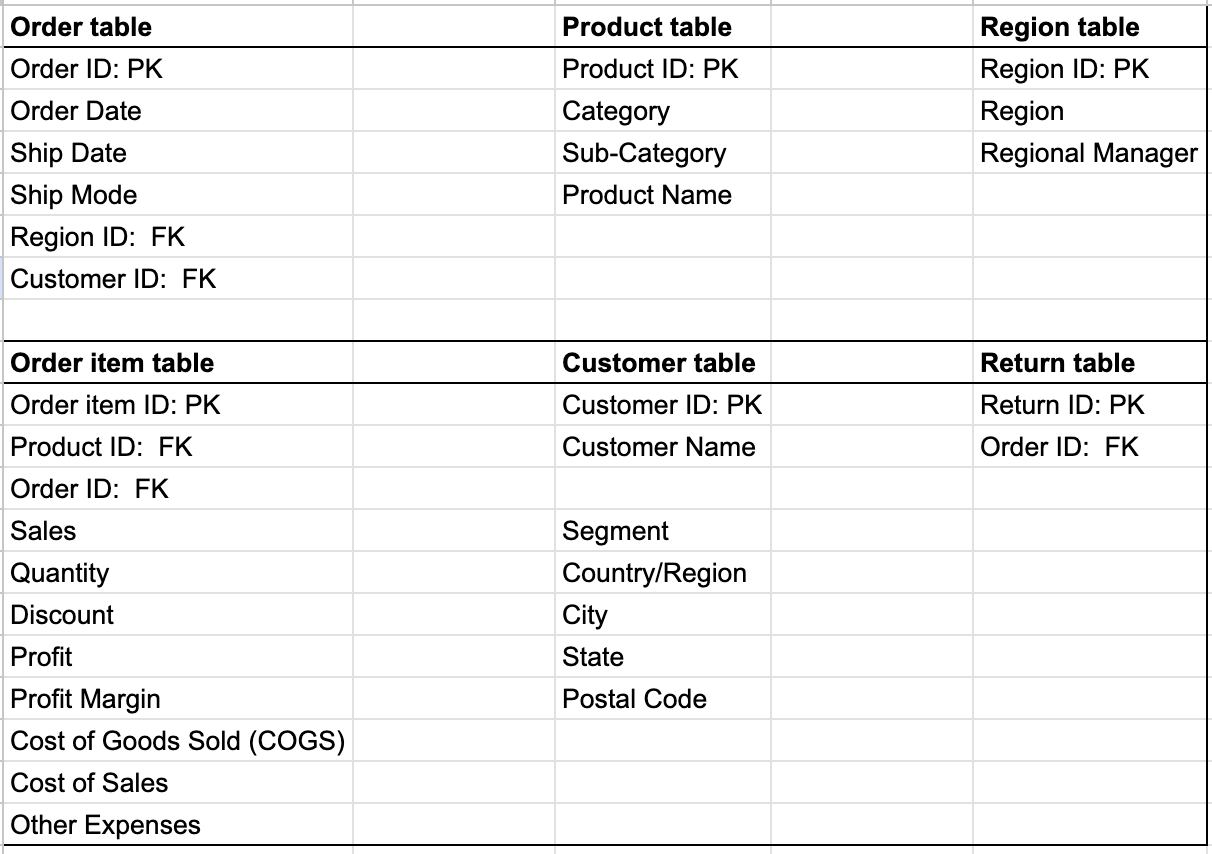

#### One to many: One product can have multiple orders

In [70]:
product = order[['Product ID', 'Category', 'Sub-Category', 'Product Name']].groupby("Product ID", as_index=False).first()

In [71]:
product

,Product ID,Category,Sub-Category,Product Name
0,FUR-BO-10000112,Furniture,Bookcases,"Bush Birmingham Collection Bookcase, Dark Cherry"
1,FUR-BO-10000330,Furniture,Bookcases,"Sauder Camden County Barrister Bookcase, Plank..."
2,FUR-BO-10000362,Furniture,Bookcases,Sauder Inglewood Library Bookcases
3,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases
4,FUR-BO-10000711,Furniture,Bookcases,"Hon Metal Bookcases, Gray"
...,...,...,...,...
1857,TEC-PH-10004912,Technology,Phones,Cisco SPA112 2 Port Phone Adapter
1858,TEC-PH-10004922,Technology,Phones,RCA Visys Integrated PBX 8-Line Router
1859,TEC-PH-10004924,Technology,Phones,"SKILCRAFT Telephone Shoulder Rest, 2"" x 6.5"" x..."
1860,TEC-PH-10004959,Technology,Phones,Classic Ivory Antique Telephone ZL1810


#### Many to one relationship: Many order can belong to one region

In [235]:
region = pd.read_excel("/Users/vignesh/Documents/george brown pgdm /Foundation of data management/Lab Exercises/Sample - Superstore - Final.xlsx", "People")

In [236]:
region.reset_index(names="Region ID", inplace=True)
region = region[["Region ID", "Region", "Regional Manager"]]

In [237]:
region.head()

,Region ID,Region,Regional Manager
0,0,West,Sadie Pawthorne
1,1,East,Chuck Magee
2,2,Central,Roxanne Rodriguez
3,3,South,Fred Suzuki


#### One to Many relationship: One order will have multiple order item table. In other words, Multiple order item will be linked to one order table

In [242]:
order_item = order[['Sales', 'Quantity', 'Discount','Profit', 'Profit Margin', 'Cost of Goods Sold', 'Cost of Sales','Other Expenses', 'Row ID', 'Order ID', "Product ID"]]

In [243]:
for i, row in order_item.iterrows():
    order_item.loc[i, "Order Item ID"] = row["Order ID"] + "_" +str(row["Row ID"])
    
order_item.drop(["Row ID"], axis=1, inplace=True)

order_item = order_item[["Order Item ID", "Order ID", "Product ID", 'Sales', 'Quantity', 'Discount', 'Profit', 'Profit Margin',
       'Cost of Goods Sold', 'Cost of Sales', 'Other Expenses']]

/var/folders/z_/k2vg98mx00vfrwzbj9gz0gj40000gp/T/ipykernel_26792/4161602233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_item.loc[i, "Order Item ID"] = row["Order ID"] + "_" +str(row["Row ID"])
/var/folders/z_/k2vg98mx00vfrwzbj9gz0gj40000gp/T/ipykernel_26792/4161602233.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_item.drop(["Row ID"], axis=1, inplace=True)


In [244]:
order_item.head()

,Order Item ID,Order ID,Product ID,Sales,Quantity,Discount,Profit,Profit Margin,Cost of Goods Sold,Cost of Sales,Other Expenses
0,CA-2020-152156_1,CA-2020-152156,FUR-BO-10001798,261.9600,2,0.00,41.9136,0.1600,146.697600,36.674400,36.674400
1,CA-2020-152156_2,CA-2020-152156,FUR-CH-10000454,731.9400,3,0.00,219.5820,0.3000,341.572000,85.393000,85.393000
2,CA-2020-138688_3,CA-2020-138688,OFF-LA-10000240,14.6200,2,0.00,6.8714,0.4700,5.165733,1.291433,1.291433
3,US-2019-108966_4,US-2019-108966,FUR-TA-10000577,957.5775,5,0.45,-383.0310,-0.4000,1181.012250,295.253062,295.253062
4,US-2019-108966_5,US-2019-108966,OFF-ST-10000760,22.3680,2,0.20,2.5164,0.1125,16.216800,4.054200,4.054200


In [245]:
order_item.shape

(9994, 11)

In [227]:
len(order_item["Product ID"])

9994

#### One to many relationship: One customer can have multiple orders

In [259]:
customer = order[['Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code']].groupby("Customer ID", as_index=False).first()

In [272]:
from unidecode import unidecode

customer_cp = pd.DataFrame()
for i, row in customer.iterrows():
    for column in customer.columns:
        customer_cp.loc[i, column] = unidecode(row[column])    

Cafe au Lait
AA-10315
Alex Avila
Consumer
United States
Minneapolis
Minnesota
55407
AA-10375
Allen Armold
Consumer
United States
Mesa
Arizona
85204
AA-10480
Andrew Allen
Consumer
United States
Concord
North Carolina
28027
AA-10645
Anna Andreadi
Consumer
United States
Chester
Pennsylvania
19013
AB-10015
Aaron Bergman
Consumer
United States
Seattle
Washington
98103
AB-10060
Adam Bellavance
Home Office
United States
New York City
New York
10009
AB-10105
Adrian Barton
Consumer
United States
Phoenix
Arizona
85023
AB-10150
Aimee Bixby
Consumer
United States
Long Beach
New York
11561
AB-10165
Alan Barnes
Consumer
United States
Los Angeles
California
90036
AB-10255
Alejandro Ballentine
Home Office
United States
Lorain
Ohio
44052
AB-10600
Ann Blume
Corporate
United States
Tucson
Arizona
85705
AC-10420
Alyssa Crouse
Corporate
United States
San Francisco
California
94122
AC-10450
Amy Cox
Consumer
United States
Minneapolis
Minnesota
55407
AC-10615
Ann Chong
Corporate
United States
New York City
Ne

SS-20515
Shirley Schmidt
Home Office
United States
Louisville
Kentucky
40214
SS-20590
Sonia Sunley
Consumer
United States
Seattle
Washington
98115
SS-20875
Sung Shariari
Consumer
United States
Dallas
Texas
75220
ST-20530
Shui Tom
Consumer
United States
Parma
Ohio
44134
SU-20665
Stephanie Ulpright
Home Office
United States
Jackson
Mississippi
39212
SV-20365
Seth Vernon
Consumer
United States
Dover
Delaware
19901
SV-20785
Stewart Visinsky
Consumer
United States
Pueblo
Colorado
81001
SV-20815
Stuart Van
Corporate
United States
Houston
Texas
77041
SV-20935
Susan Vittorini
Consumer
United States
New York City
New York
10009
SW-20245
Scot Wooten
Consumer
United States
Stockton
California
95207
SW-20275
Scott Williamson
Consumer
United States
Jackson
Mississippi
39212
SW-20350
Sean Wendt
Home Office
United States
Detroit
Michigan
48227
SW-20455
Shaun Weien
Consumer
United States
Suffolk
Virginia
23434
SW-20755
Steven Ward
Corporate
United States
New York City
New York
10009
SZ-20035
Sam Zeldi

In [260]:
customer.head()

,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code
0,AA-10315,Alex Avila,Consumer,United States,Minneapolis,Minnesota,55407.0
1,AA-10375,Allen Armold,Consumer,United States,Mesa,Arizona,85204.0
2,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0
3,AA-10645,Anna Andreadi,Consumer,United States,Chester,Pennsylvania,19013.0
4,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103.0


#### One to one relationship: Only one return is possible per order

##### We are assuming return is for order instead of order item.

In [247]:
returns = pd.read_excel("/Users/vignesh/Documents/george brown pgdm /Foundation of data management/Lab Exercises/Sample - Superstore - Final.xlsx", "Returns")

In [248]:
returns = returns.groupby("Order ID", as_index=False).first()

In [249]:
returns["Returns ID"] = returns["Order ID"].apply(lambda x: f"R_{x}")
returns.drop(["Returned"], axis=1, inplace=True)
returns = returns[["Returns ID", "Order ID"]]

In [250]:
returns.head()

,Returns ID,Order ID
0,R_CA-2018-100762,CA-2018-100762
1,R_CA-2018-100867,CA-2018-100867
2,R_CA-2018-102652,CA-2018-102652
3,R_CA-2018-103373,CA-2018-103373
4,R_CA-2018-103744,CA-2018-103744


#### Order table

In [233]:
order_table = order[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', "Region", "Customer ID"]]

In [234]:
order_table = order_table.groupby('Order ID', as_index=False).first()

In [238]:
region_dict = dict(zip(region.Region, region["Region ID"]))

for i, row in order_table.iterrows():
    order_table.loc[i, "Region"] = region_dict.get(row["Region"])

In [239]:
order_table.head()

,Order ID,Order Date,Ship Date,Ship Mode,Region,Customer ID
0,CA-2018-100006,2018-09-07,2018-09-13,Standard Class,1,DK-13375
1,CA-2018-100090,2018-07-08,2018-07-12,Standard Class,0,EB-13705
2,CA-2018-100293,2018-03-14,2018-03-18,Standard Class,3,NF-18475
3,CA-2018-100328,2018-01-28,2018-02-03,Standard Class,1,JC-15340
4,CA-2018-100363,2018-04-08,2018-04-15,Standard Class,0,JM-15655


In [263]:
customer

,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code
0,AA-10315,Alex Avila,Consumer,United States,Minneapolis,Minnesota,55407
1,AA-10375,Allen Armold,Consumer,United States,Mesa,Arizona,85204
2,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027
3,AA-10645,Anna Andreadi,Consumer,United States,Chester,Pennsylvania,19013
4,AB-10015,Aaron Bergman,Consumer,United States,Seattle,Washington,98103
...,...,...,...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,United States,San Diego,California,92024
789,YC-21895,Yoseph Carroll,Corporate,United States,San Francisco,California,94110
790,YS-21880,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217
791,ZC-21910,Zuschuss Carroll,Consumer,United States,Salem,Oregon,97301


## Write to csv

In [246]:
product.to_csv("Product table1.csv", index=False)
region.to_csv("Region table1.csv", index=False)
order_detail.to_csv("Order Detail table1.csv", index=False)
customer.to_csv("Customer table1.csv", index=False)
returns.to_csv("Returns table1.csv", index=False)
order_table.to_csv("Order table1.csv", index=False)